In [30]:
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [55]:
path_to_figs = "/ubc/cs/research/beaver/projects/carlos/hyperbolic/figures/benchmarking/pancreas/"
path_to_evals = "/ubc/cs/research/beaver/projects/carlos/hyperbolic/results/benchmarking/pancreas/initial_runs/"

In [56]:
cluster_to_use = "louvain"
metrics_to_use = ["MI", "NMI", "ARI"]

# Figure params
fig_size = (3.5, 3.5)
large_fs = 12
small_fs = 9

inset_y_pos = 0.6
inset_width = 0.15
inset_height = 0.35

In [57]:
# Let's map each metric to an x-coordinate
metrics_to_x = {
    metric: i for i, metric in enumerate(metrics_to_use)
}

iter_to_color = {
    "r2r2_component2_r2": "#d90429",
    "r2r2_z2nograd_component2_r2": "#ff758f",
    "uq_2latents_CUcc_zk_notInf": "#1d3557",
    "sh_proj10_2latents_CUcc_z1_nograd": "#457b9d",
    "uq_2latents_CUcc_z1_nograd": "#a8dadc",
}

### Visualizing z2 results: developmental trajectory / clusters_fine

In [58]:
eval_devtra = pd.read_csv(path_to_evals + "eval_clusters_fine", sep="\t", index_col=0)
eval_devtra = eval_devtra[metrics_to_use + ["model", "iter"]]
eval_devtra = eval_devtra[eval_devtra.index.str.contains("z2")]
eval_devtra = eval_devtra[eval_devtra.index.str.contains(cluster_to_use)]
eval_devtra

,MI,NMI,ARI,model,iter
z2_louvain,1.463631,0.571365,0.275941,cu,r2r2_z2nograd_component2_r2
z2_louvain,1.283992,0.506275,0.235751,cu,r2r2_component2_r2
z2_louvain,1.523979,0.588526,0.261791,pgm,uq_2latents_CUcc_zk_notInf
z2_louvain,0.853753,0.333334,0.119819,pgm,uq_2latents_CUcc_z1_nograd
z2_louvain,0.978501,0.387148,0.166881,pgm,sh_proj10_2latents_CUcc_z1_nograd


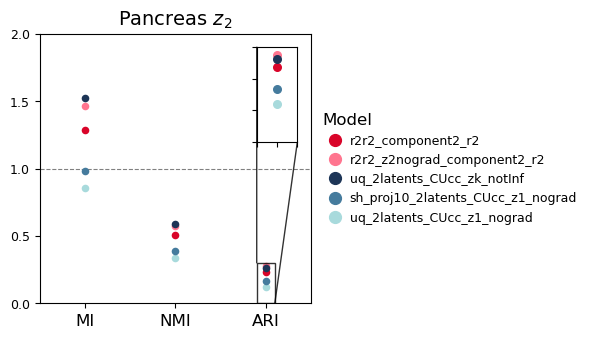

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fig_size)

ax.set_title("Pancreas $z_2$", fontsize=large_fs+2)

ax.set_xlim(-0.5, 2.5)
ax.set_xticks(list(metrics_to_x.values()))
ax.set_xticklabels(list(metrics_to_x.keys()), fontsize=large_fs)

ax.set_ylim(0, 2)
ax.set_yticks(np.arange(0, 2.1, step=0.5))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=small_fs)

ax.axhline(y=1, color="grey", linestyle="--", linewidth=0.8, zorder=0)

for idx, row in eval_devtra.iterrows():
    c  = iter_to_color[row["iter"]]
    for m in list(metrics_to_x.keys()):
        ax.scatter(x=metrics_to_x[m], y=row[m], s=30, c=c, lw=0)

# Legend
handles = [Line2D([0], [0], marker="o", linestyle="None", color=color, markerfacecolor=color, markersize=8.5, label=label) for label, color in iter_to_color.items()]
leg = plt.legend(handles=handles, loc="center left", frameon=False, fontsize=small_fs, title_fontsize=large_fs, alignment="left", handletextpad=0.2)
leg.set_title("Model")
leg.set_bbox_to_anchor((1, 0.5))

# Inset axis
x1, x2, y1, y2 = 1.9, 2.1, 0, 0.3
axins = ax.inset_axes(
    [0.8, inset_y_pos, inset_width, inset_height],
    xlim=(x1, x2), 
    ylim=(y1, y2),
    xticklabels=[],
    yticklabels=[]
)
ax.indicate_inset_zoom(axins, edgecolor="k", alpha=0.8)

for idx, row in eval_devtra.iterrows():
    c  = iter_to_color[row["iter"]]
    for m in ["ARI"]:
        axins.scatter(x=metrics_to_x[m], y=row[m], s=30, c=c)

plt.savefig(f"{path_to_figs}{path_to_evals.split('/')[-2]}_z2_eval.png", dpi=800, bbox_inches="tight")

### Visualizing z1 results: cell cycle phase / ccPhase

In [61]:
eval_cc = pd.read_csv(path_to_evals + "eval_ccPhase_subset_DuctalNgn3 low EP", sep="\t", index_col=0)
eval_cc = eval_cc[metrics_to_use + ["model", "iter"]]
eval_cc = eval_cc[eval_cc.index.str.contains("z1")]
eval_cc = eval_cc[eval_cc.index.str.contains(cluster_to_use)]
eval_cc

,MI,NMI,ARI,model,iter
z1_louvain,0.517747,0.248845,0.093345,pgm,uq_2latents_CUcc_z1_nograd
z1_louvain,0.506393,0.242905,0.099445,pgm,sh_proj10_2latents_CUcc_z1_nograd
z1_louvain,0.439715,0.204667,0.074989,cu,r2r2_z2nograd_component1_r2
z1_louvain,0.592724,0.278606,0.111577,pgm,uq_2latents_CUcc_zk_notInf
z1_louvain,0.497017,0.237750,0.088946,cu,r2r2_component1_r2


In [62]:
iter_to_color = {
    "r2r2_component1_r2": "#d90429",
    "r2r2_z2nograd_component1_r2": "#ff758f",
    "uq_2latents_CUcc_zk_notInf": "#1d3557",
    "sh_proj10_2latents_CUcc_z1_nograd": "#457b9d",
    "uq_2latents_CUcc_z1_nograd": "#a8dadc",
}

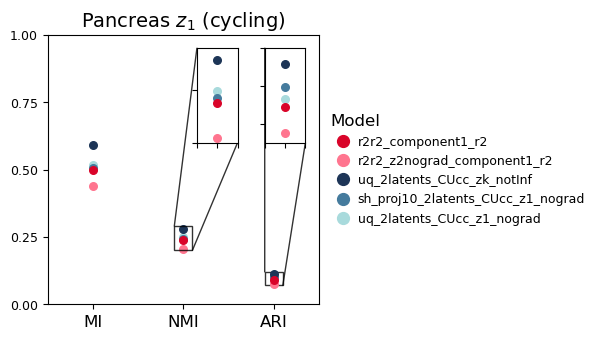

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fig_size)

ax.set_title("Pancreas $z_1$ (cycling)", fontsize=large_fs+2)

ax.set_xlim(-0.5, 2.5)
ax.set_xticks(list(metrics_to_x.values()))
ax.set_xticklabels(list(metrics_to_x.keys()), fontsize=large_fs)

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, step=0.25))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=small_fs)

for idx, row in eval_cc.iterrows():
    c  = iter_to_color[row["iter"]]
    for m in list(metrics_to_x.keys()):
        ax.scatter(x=metrics_to_x[m], y=row[m], s=30, c=c)

# Legend
handles = [Line2D([0], [0], marker="o", linestyle="None", color=color, markerfacecolor=color, markersize=8.5, label=label) for label, color in iter_to_color.items()]
leg = plt.legend(handles=handles, loc="center left", frameon=False, fontsize=small_fs, title_fontsize=large_fs, alignment="left", handletextpad=0.2)
leg.set_title("Model")
leg.set_bbox_to_anchor((1, 0.5))

# Inset axis 2
x1, x2, y1, y2 = 0.9, 1.1, 0.20, 0.29
axins = ax.inset_axes(
    [0.55, inset_y_pos, inset_width, inset_height],
    xlim=(x1, x2), 
    ylim=(y1, y2),
    xticklabels=[],
    yticklabels=[]
)
ax.indicate_inset_zoom(axins, edgecolor="k", alpha=0.8)

for idx, row in eval_cc.iterrows():
    c  = iter_to_color[row["iter"]]
    axins.scatter(x=metrics_to_x["NMI"], y=row["NMI"], s=30, c=c)

# Inset axis 3
x1, x2, y1, y2 = 1.9, 2.1, 0.07, 0.12
axins = ax.inset_axes(
    [0.8, inset_y_pos, inset_width, inset_height],
    xlim=(x1, x2), 
    ylim=(y1, y2),
    xticklabels=[],
    yticklabels=[]
)
ax.indicate_inset_zoom(axins, edgecolor="k", alpha=0.8, zorder=0)

for idx, row in eval_cc.iterrows():
    c  = iter_to_color[row["iter"]]
    axins.scatter(x=metrics_to_x["ARI"], y=row["ARI"], s=30, c=c)

plt.savefig(f"{path_to_figs}{path_to_evals.split('/')[-2]}_z1_eval.png", dpi=800, bbox_inches="tight")